# Maze Transformation Detection

This was the first basic proof of concept where I utilized fastai to create a simple classification model to determine if a maze had a distortion applied to it.  It was trained only on a dataset of mazes.

In [1]:
from fastcore.all import *
from fastai.vision.all import *
import os
import shutil

In [2]:
!pwd

/kaggle/working


In [3]:
path = os.path.relpath("/kaggle/input/distorted-mazes/data")
files = os.listdir(path)
files

['distorted', 'maze', 'fresh_maze']

In [4]:
shutil.copytree("/kaggle/input/distorted-mazes/data/", "/kaggle/output", dirs_exist_ok=True)
os.chdir("/kaggle/output")
shutil.rmtree("fresh_maze")

In [5]:
distorted_files = os.listdir("distorted")
maze_files = os.listdir("maze")
# fresh_maze_files = os.listdir("fresh_maze")
print(len(distorted_files))
print(len(maze_files))
# print(len(fresh_maze_files))

3000
3000


In [6]:
os.chdir("../")
path = os.path.relpath("output")

In [7]:
dls_1 = ImageDataLoaders.from_folder(path, valid_pct=0.2)

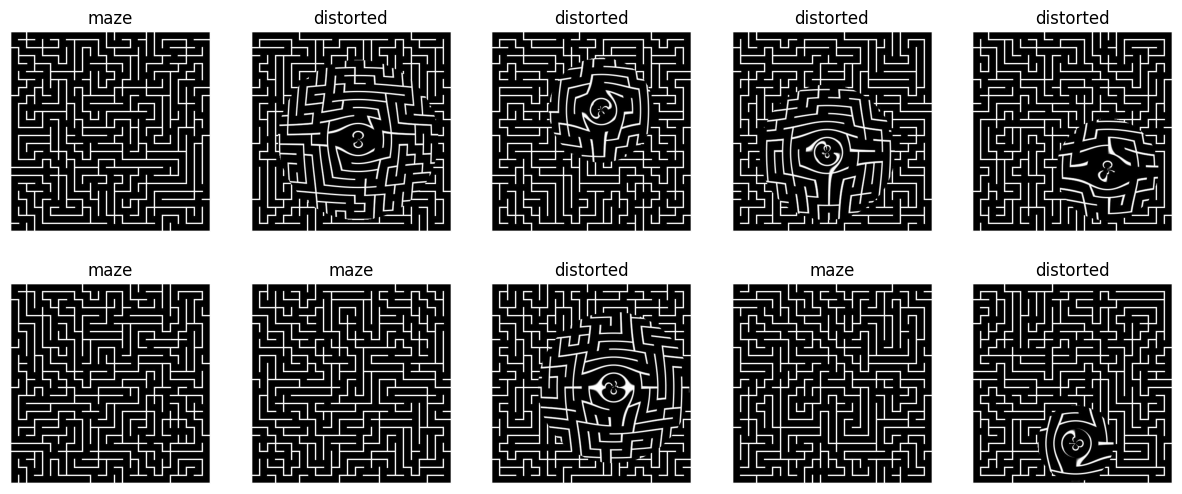

In [8]:
dls_1.valid.show_batch(max_n=10, nrows=2)

In [9]:
learn_bias = vision_learner(dls_1, resnet34, metrics=error_rate)
learn_bias.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 159MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.184688,0.033104,0.005833,01:17


epoch,train_loss,valid_loss,error_rate,time
0,0.047312,0.020855,0.003333,01:49


In [10]:
learn_bias.export("/kaggle/working/model_bias.pkl")

# Utilizing Fresh Mazes
Previously we trained a model on mazes and the same mazes, but with a distortion effect applied to them.  I assumed that this could result in a bias begin created, therefore, we will run the same training regime on a new model that has a fresh set of mazes generated just for training purposes.  

In [11]:
shutil.copytree("/kaggle/input/distorted-mazes/data/", "/kaggle/output", dirs_exist_ok=True)
os.chdir("/kaggle/output")
shutil.rmtree("maze")

In [12]:
os.chdir("../")
path = os.path.relpath("output")

In [13]:
dls_2 = ImageDataLoaders.from_folder(path, valid_pct=0.2)

In [14]:
learn_fresh = vision_learner(dls_2, resnet34, metrics=error_rate)
learn_fresh.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.171141,0.022297,0.005000,01:24


epoch,train_loss,valid_loss,error_rate,time
0,0.040919,0.013605,0.000833,01:50


In [15]:
learn_fresh.export("/kaggle/working/model_fresh.pkl")